<a href="https://colab.research.google.com/github/bahadurshubham/bahadurshubham/blob/main/monkey_pox_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/monkey_pox_dataset.csv')
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [ ]:
listitem = []

for col in df.columns:
    listitem.append({
        'column' : col,
        'data type' : df[col].dtype,
        'null total' : df[col].isna().sum(),
        'null pctg' : round(df[col].isna().sum()/len(df[col])*100,2),
        'n_unique' : df[col].nunique(),
        'sample' : df[col].drop_duplicates().sample(2).values   
    })
    
pd.DataFrame(listitem)

,column,data type,null total,null pctg,n_unique,sample
0,Patient_ID,object,0,0.0,25000,"[P15571, P16825]"
1,Systemic Illness,object,0,0.0,4,"[Fever, Swollen Lymph Nodes]"
2,Rectal Pain,bool,0,0.0,2,"[False, True]"
3,Sore Throat,bool,0,0.0,2,"[False, True]"
4,Penile Oedema,bool,0,0.0,2,"[True, False]"
5,Oral Lesions,bool,0,0.0,2,"[True, False]"
6,Solitary Lesion,bool,0,0.0,2,"[True, False]"
7,Swollen Tonsils,bool,0,0.0,2,"[False, True]"
8,HIV Infection,bool,0,0.0,2,"[True, False]"
9,Sexually Transmitted Infection,bool,0,0.0,2,"[False, True]"


In [ ]:
df['MonkeyPox'].value_counts()

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64

In [ ]:
positive = df[df['MonkeyPox'] == 'Positive']
positive.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
6,P6,Fever,False,True,False,False,False,False,True,False,Positive


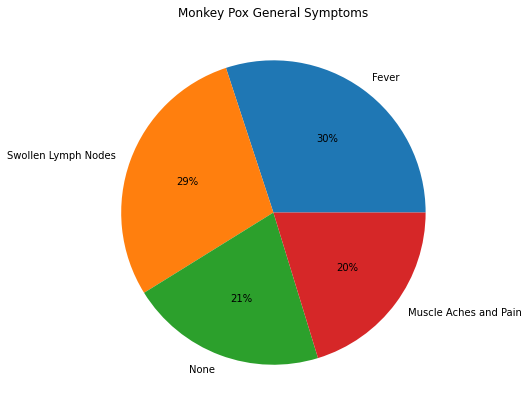

In [ ]:
fig = plt.figure(figsize=(14,7))
plt.pie(x=positive['Systemic Illness'].value_counts(),labels = positive['Systemic Illness'].value_counts().index,autopct='%.0f%%')
plt.title('Monkey Pox General Symptoms')
plt.show()

In [ ]:
positive['Systemic Illness'].value_counts()

Fever                    4780
Swollen Lymph Nodes      4581
None                     3324
Muscle Aches and Pain    3224
Name: Systemic Illness, dtype: int64

In [ ]:
positive = positive.replace([True,False], [1,0])
positive.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,1,0,1,1,0,0,1,0,Positive
2,P2,Fever,0,1,1,0,0,0,1,0,Positive
3,P3,None,1,0,0,0,1,1,1,0,Positive
4,P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,Positive
6,P6,Fever,0,1,0,0,0,0,1,0,Positive


In [ ]:
for i,col in enumerate(positive.columns[2:-1]):
  fig = px.histogram(positive,x=col,color=col)
  fig.update_xaxes(tickvals=[0,1])
  fig.update_yaxes(range=[0,10000])
  fig.show()

In [ ]:
new = []

for i,col in enumerate(positive.columns[2:-1]):
  new.append(round(positive[col].sum() / len(positive)*100,2))

symptomp = pd.DataFrame(new,index = [positive.columns[2:-1]],columns=['Total'])
symptomp = symptomp.reset_index()
symptomp.columns = ['name', 'Total']

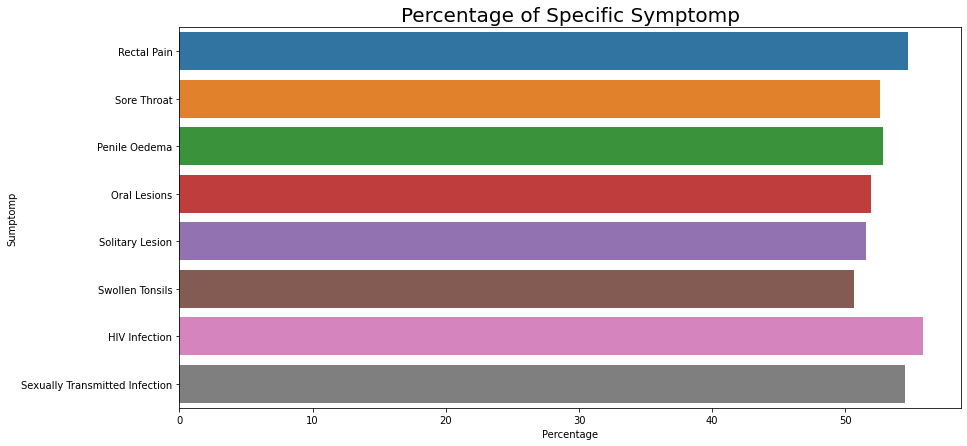

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x='Total',y='name',data=symptomp)
plt.xlabel('Percentage')
plt.ylabel('Sumptomp')
plt.title('Percentage of Specific Symptomp',size=20)
plt.show()

In [ ]:
df['MonkeyPox'] = np.where(df['MonkeyPox'] == 'Positive',1,0)
df.drop(['Patient_ID'],axis=1,inplace=True)
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,False,True,True,True,False,True,False,False,0
1,Fever,True,False,True,True,False,False,True,False,1
2,Fever,False,True,True,False,False,False,True,False,1
3,None,True,False,False,False,True,True,True,False,1
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,1


In [ ]:
X = df.drop(['MonkeyPox'],axis=1)
Y = df['MonkeyPox']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold

X_train, X_test, Y_train, Y_test= train_test_split(
    X,
    Y,  
    test_size=0.2,
    stratify = Y,
    random_state=1)

In [ ]:
column = [col for col in df.columns[:-1]]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer([('One Hot', OneHotEncoder(),column)])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier() 

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,Y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression','KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'Recall Score':rata,'stdev':std}).set_index('model').sort_values(by='Recall Score',ascending=False)

,Recall Score,stdev
model,,
LightGBM,0.890233,0.004377
XGBoost,0.881275,0.004860
Logistic Regression,0.865796,0.004459
Random Forest,0.845525,0.007012
Decision Tree,0.827454,0.009833
KNN,0.778895,0.008229


In [ ]:
estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)])

In [ ]:
estimator.fit(X_train,Y_train)
prediction = estimator.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.65      0.33      0.44      1818
           1       0.70      0.90      0.79      3182

    accuracy                           0.69      5000
   macro avg       0.67      0.61      0.61      5000
weighted avg       0.68      0.69      0.66      5000



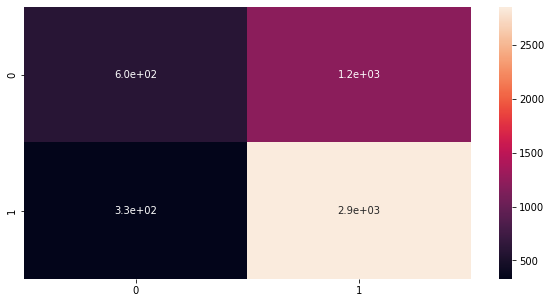

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, prediction),annot=True)
plt.show()